# Алгоритм статистического анализа

<img src="img/scheme.png" width=1100>

## Проверка нормальности распределения

### Графическое распределение (distplot)

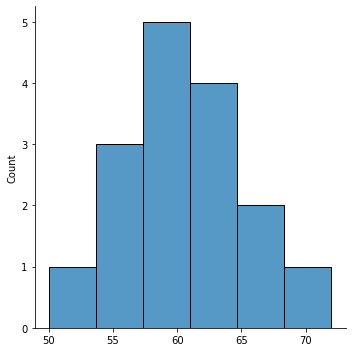

In [2]:
import seaborn as sns
import numpy as np

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.displot(sample, kde = False)

### Критерий Колмогорова-Смирнова (точнее при количестве исследуемых n>50)


### Критерий Шапиро-Уилка (точнее при количестве исследуемых n<50)
H0 - данные распределены нормально

In [79]:
import pandas as pd

data = pd.DataFrame({'a': [50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72]})

stats.shapiro(data.a)

# в случае большого количества данных используем выборку - sample:
# stats.shapiro(df.column.sample(1000, random_state=17))
# т.к. тест Шапиро-Уилка чувствителен к большим совокупностям.
# Cчитаем, что если ген. совокупность распределена нормально, то и выборки тоже будут нормальными.
# Но тогда прогоняем тест несколько раз, чтобы убедиться в стабильность результатов.
# random_state=17 - для стабилизации расчета p-value при сэмплировании

#p >= 0.05 - нет оснований отклонить H0, данные распределены нормально

ShapiroResult(statistic=0.9803240299224854, pvalue=0.9661158323287964)

In [81]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

W, p = stats.shapiro(sample)
print("Shapiro-Wilk test, W:", W, "p-value:", p)

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Shapiro-Wilk test, W: 0.9803240299224854 p-value: 0.9661158323287964
Принять гипотезу о нормальности


### qq-plot

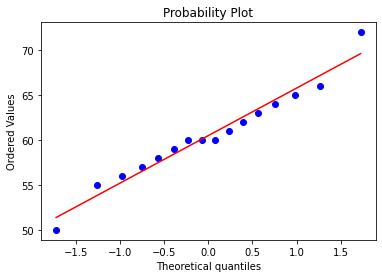

In [77]:
import numpy as np 
import pylab 
import scipy.stats as stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

stats.probplot(sample, dist="norm", plot=pylab)
pylab.show()

## Описательная статистика

### Мода, медиана и среднее

In [6]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', stats.mode(sample))
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: ModeResult(mode=array([60]), count=array([3]))
median: 60.0
mean: 60.5


In [7]:
import pandas as pd

sample = pd.Series([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    60
dtype: int64
median: 60.0
mean: 60.5


### Размах, дисперсия и стандартное отклонение

In [8]:
import numpy as np
import pandas as pd

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# размах -  разность между max и min значением из распределения
range = np.max(sample)- np.min(sample)
print(f'range = {range}')

range_2 = np.percentile(sample, [0, 100])
print(f'range(other count way) = {range_2}')

# дисперсия - средний квадрат отклонений индивидуальных значений признака от их средней величины
D = np.var(sample)
print(f'D = {D}')
# или df.A.var() , если через pandas

# cреднеквадратическое (стандартное) отклонение - корень из дисперсии
sd = np.std(sample, ddof=1)
print(f'sd = {sd}')
# или df.A.std() , если через pandas 

range = 22
range(other count way) = [50. 72.]
D = 24.125
sd = 5.072803301265814


### boxplot

/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


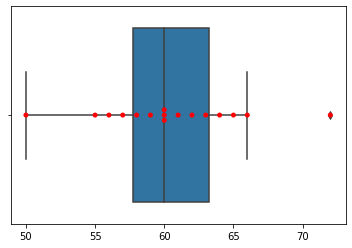

In [9]:
import seaborn as sns

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.boxplot(sample)
ax = sns.swarmplot(sample, color = 'Red') # дополнительное наложение точек

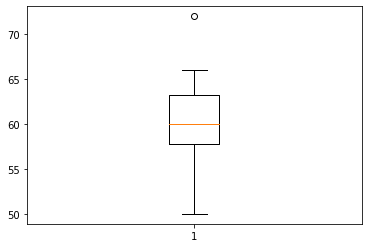

In [10]:
import matplotlib.pyplot as plt

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

plt.boxplot(sample, showfliers=1)
plt.show()

### Доверительный интервал
среднее значение генеральной совокупности принадлежит рассчитанному доверительному интервалу с заданной вероятностью (например, 95%)

95% - μ±1.96se; 99% - μ±2.58se

In [11]:
# если считать по формулам и известны меры центральной тенденции и меры изменчивости

from numpy import sqrt
from scipy import stats

p = 0.95  # % интервала
mean = 60.5
std = 5.072803301265814
n = 16

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonf_interval = mean - sigma*se, mean + sigma*se

print(сonf_interval)

(58.01437205721578, 62.98562794278422)


In [12]:
# с помощью методов библиотек

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# первый способ
print(st.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)))
# второй способ
print(sms.DescrStatsW(sample).tconfint_mean())

(57.79689392720129, 63.20310607279871)
(57.79689392720129, 63.20310607279871)


## Стандартизация (Z-преобразование)
преобразование, которое позволяет любую шкалу перевести в стандартную Z-шкалу (Z-scores), где среднее значение будет равно нулю, а стандартное отклонение – 1. Форма распределения при этом не изменится.

In [13]:
from scipy.stats import zscore

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

zscore(sample)

array([-2.13774371, -1.11977052, -0.91617588, -0.71258124, -0.5089866 ,
       -0.30539196, -0.10179732, -0.10179732, -0.10179732,  0.10179732,
        0.30539196,  0.5089866 ,  0.71258124,  0.91617588,  1.11977052,
        2.34133835])

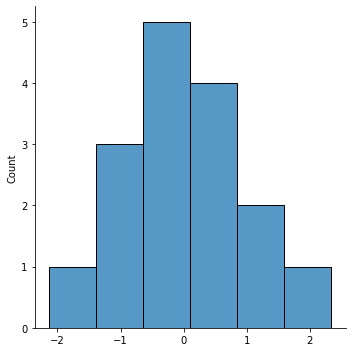

In [14]:
import seaborn as sns

ax = sns.displot(zscore(sample), kde = False)

## Стандартная ошибка среднего (SE)
показывает, насколько выборочное среднее отличается от среднего генеральной совокупности. SE при увеличении размера выборки будет стремиться к нулю.

In [ ]:
# import pandas as pd
# df.A.sem()

# from scipy import stats
# stats.sem(df.A)

## t-критерий Стьюдента для независимых выборок
t-критерий Стьюдента используется для определения статистической значимости различий средних величин.
Н0 - статзначимых различий нет.

Если pvalue >= 0.05, НЕ можем отклонить нулевую гипотезу, т.е. значимых различий нет.

Если pvalue < 0.05, можем отклонить нулевую гипотезу, т.е. группы значимо различаются.

In [31]:
# scipy по колонкам датафрейма 

import pandas as pd
from scipy import stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

stats.ttest_ind(data.a, data.b)

Ttest_indResult(statistic=-2.449489742783178, pvalue=0.07048399691021993)

In [37]:
# пингвин (нужно переменным присвоить колонки)

import pingouin as pg

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

aa = data.a
bb = data.b

pg.ttest(aa, bb)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.44949,4,two-sided,0.070484,"[-4.27, 0.27]",2.0,1.654,0.462641


In [16]:
# по формулам если известны меры центральной тенденции и меры изменчивости

from scipy.stats import t
from numpy import sqrt

mean_1 = 45
mean_2 = 44
sd_1 = 3
sd_2= 4
n1= 50
n2 = 50

se = sqrt((sd_1 ** 2)/n1 + (sd_2 ** 2)/n2)
t_value = (mean_1 - mean_2)/se
print(f't_value = {t_value}')

p = t.sf(t_value, n1+n2-2)
print(f'p = {p}')

if p >= 0.05:
    print('p >= 0.05, НЕ можем отклонить нулевую гипотезу')
else:
    print('p < 0.05, можем отклонить нулевую гипотезу')

t_value = 1.414213562373095
p = 0.08023418166343646
p >= 0.05, НЕ можем отклонить нулевую гипотезу


## Однофакторный дисперсионный анализ (ANOVA)
анализ для двух или нескольких независимых групп, когда все группы объединены по одному признаку. В ходе анализа проверяется нулевая гипотеза о равенстве средних.

#### 1.Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена (H0 - дисперсии гомогенны).

In [96]:
import pandas as pd
import scipy.stats as stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
aa = data.a
bb = data.b
cc = data.c

stats.levene(aa, bb, cc)

# pvalue >= 0.05 - дисперсии гомогенны
# pvalue < 0.05 - дисперсии разные

LeveneResult(statistic=0.0, pvalue=1.0)

если дисперсии разные, можно сделать дисперсионный анализ Уэлча (см. п.5)

#### 2. Проверяем нормальность распределения (Шапиро-Уилка).
#### 3. Проводим сам тест (дисперсионный анализ).

In [97]:
from scipy import stats

stats.f_oneway(aa, bb, cc)

# pvalue >= 0.05 - значимых различий между группами нет
# pvalue < 0.05 - значимые различия между группами есть

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

In [98]:
# пингвин
# для него нужно преобразовать датафрейм data к формату двух колонок

data1 = pd.DataFrame({'c1':np.repeat(data.columns,len(data)),
                  'c2':data.to_numpy().transpose().flatten()})

In [100]:
data1

,c1,c2
0,a,3
1,a,1
2,a,2
3,b,5
4,b,3
5,b,4
6,c,7
7,c,6
8,c,5


In [99]:
import pingouin as pg

pg.anova(data = data1, dv = 'c2', between = 'c1')

,Source,ddof1,ddof2,F,p-unc,np2
0,c1,2,6,12.0,0.008,0.8


In [53]:
# здесть F - F-values (то же, что statistic в stats); p-unc - pvalue

#### 4. Определим, между какими группами есть статистически значимые различия с помощью критерия Тьюки

In [104]:
# также работаем с преобразованным data1

In [105]:
# с помощью statsmodels

from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data1.c2, data1.c1).summary()

# смотрим на reject - если true - H0 отвергается (т.е. между группам статзначимые различия есть)

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,2.0,0.1089,-0.5052,4.5052,False
a,c,4.0,0.0065,1.4948,6.5052,True
b,c,2.0,0.1089,-0.5052,4.5052,False


In [106]:
# пингвин

import pingouin as pg

pg.pairwise_tukey(data = data1, dv = 'c2', between = 'c1')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a,b,2.0,4.0,-2.0,0.816497,-2.449490,0.108867,-1.6
1,a,c,2.0,6.0,-4.0,0.816497,-4.898979,0.006494,-3.2
2,b,c,4.0,6.0,-2.0,0.816497,-2.449490,0.108867,-1.6


<AxesSubplot:>

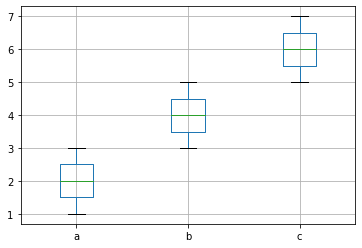

In [107]:
# ну и можно посмотреть на взаимное расположение боксплотов

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
data.boxplot()

#### 5. Дисперсионный анализ Уэлча

In [71]:
# import pingouin as pg
# pg.welch_anova(data=данные, dv="зависимая_переменная", between="независимая_переменная")

In [62]:
# дисперсионный анализ по формулам

from scipy import stats
import pandas as pd

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print(f'p = {p}')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
p = 0.008000000000000002
отклоняем нулевую гипотезу


## Многофакторный дисперсионный анализ
позволяет проверить влияние нескольких факторов на зависимую переменную.

### Коэффициент корреляции Пирсона

метод параметрической статистики, позволяющий определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость. Другими словами, критерий корреляции Пирсона позволяет определить, изменяется ли (возрастает или уменьшается) один показатель в ответ на изменения другого? В статистических расчетах и выводах коэффициент корреляции обычно обозначается как rxy или Rxy.

https://medstatistic.ru/methods/methods8.html

In [ ]:
import pandas as pd
from scipy import stats

data = {'list 1':[4, 5, 2, 3, 1],'list 2':[2, 1, 4 ,3, 5]}

df = pd.DataFrame(data, columns = ['list 1','list 2'])

pearson_coef, p_value = stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient:", pearson_coef)
print("P-value:", p_value)

In [ ]:
import numpy
list1 = [4, 5, 2, 3, 1]
list2 = [2, 1, 4 ,3, 5]
numpy.corrcoef(list1, list2)[0, 1]

In [ ]:
from scipy.stats import linregress
linregress(list1, list2)
#also works with a two-row pandas.DataFrame: lineregress(two_row_df)